# Required tasks
1. Dataset visualization: plot L vs M and encode T (color or marker size).

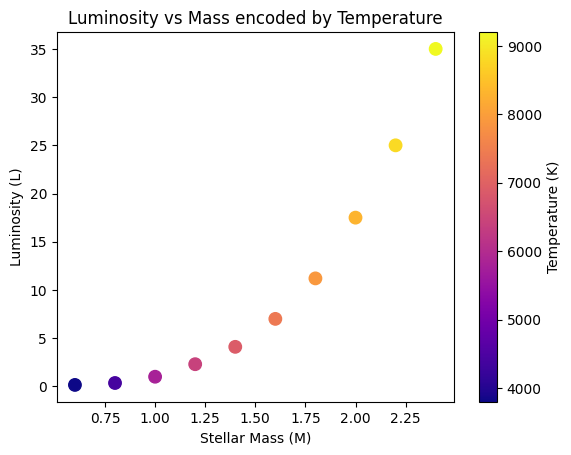

In [48]:
import numpy as np
import matplotlib.pyplot as plt


#Dataset
M = [0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4]
T = [3800, 4400, 5800, 6400, 6900, 7400, 7900, 8300, 8800, 9200]
L = [0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0]

plt.scatter(M, L, c=T, cmap="plasma", s=80)
plt.colorbar(label="Temperature (K)")
plt.xlabel("Stellar Mass (M)")
plt.ylabel("Luminosity (L)")
plt.title("Luminosity vs Mass encoded by Temperature")
plt.show()

2. Feature engineering: build X with NumPy vectorization.
    - The target remains L, the X matrix will be constructed based on M and T.
    - For the impact of each characteristic, a value was chosen in relation to the size of the range of values in each behavior.
    - For the bias, the initial T value was taken.

In [49]:
import numpy as np
import pandas as pd

# Convert lists to NumPy arrays
M = np.array(M)
T = np.array(T)
L = np.array(L)

# Normalize features for stable gradient descent
M_norm = (M - M.mean()) / M.std()
T_norm = (T - T.mean()) / T.std()

# Design matrix X and target vector y
X = np.column_stack([M_norm, T_norm])
y = L

# Create a DataFrame just for inspection
data = pd.DataFrame({
    "mass": M_norm,
    "temperature": T_norm,
    "luminosity": L
})

data.head()


,mass,temperature,luminosity
0,-1.566699,-1.801236,0.15
1,-1.218544,-1.451482,0.35
2,-0.870388,-0.635388,1.00
3,-0.522233,-0.285633,2.30
4,-0.174078,0.005829,4.10


3. Loss and gradients (vectorized): implement ME and gradients w.r.t. both w and b.

In [50]:

def predict(X, w, b):
    """Compute predictions f_{w,b}(x) for all examples.

    Parameters
    ----------
    X : np.ndarray, shape (m, n)
        Design matrix: each row is x^(i).
    w : np.ndarray, shape (n,)
        Parameter vector.
    b : float
        Bias term.

    Returns
    -------
    y_hat : np.ndarray, shape (m,)
        Vector of predictions for each example.
    """
    return X @ w + b  # vectorized: matrix-vector product + scalar

def compute_cost(X, y, w, b):
    """Compute the cost J(w,b) for linear regression with multiple features.

    Uses the vectorized formula:
        J = (1 / (2m)) * (y_hat - y)^T (y_hat - y)

    Parameters
    ----------
    X : np.ndarray, shape (m, n)
    y : np.ndarray, shape (m,)
    w : np.ndarray, shape (n,)
    b : float

    Returns
    -------
    cost : float
    """
    m = X.shape[0]
    y_hat = predict(X, w, b)
    error = y_hat - y
    cost = (error @ error) / (2 * m)
    return cost

# Test with w = 0, b = 0
n = X.shape[1]
w_test = np.zeros(n)
b_test = 0.0
print("Cost with w=0, b=0:", compute_cost(X, y, w_test, b_test))

def compute_gradient(X, y, w, b):
    """Compute the gradients of J with respect to w and b.

    Vectorized formulas:
        dj_dw = (1/m) * X^T (y_hat - y)
        dj_db = (1/m) * sum(y_hat - y)
    """
    m = X.shape[0]
    y_hat = predict(X, w, b)
    error = y_hat - y

    dj_dw = (X.T @ error) / m
    dj_db = np.sum(error) / m
    return dj_dw, dj_db

dj_dw_test, dj_db_test = compute_gradient(X, y, w_test, b_test)
print("Gradient at w=0, b=0:")
print("dj_dw:", dj_dw_test)
print("dj_db:", dj_db_test)




Cost with w=0, b=0: 117.69675
Gradient at w=0, b=0:
dj_dw: [-10.41506616  -9.59761737]
dj_db: -10.36


4. Gradient descent + convergence: train and plot loss vs iterations.
    - In this case, the implementation was first carried out, just as in the class exercise, but it did not work: the model did not learn, and the cost went to infinity and became undefined. At this point, looking at the characteristics, it was understood that the T variable had a lot of weight and could be the reason why the model was not working. Therefore, it was decided to normalize it, as evidenced in one of the previous ste

In [51]:

def gradient_descent(X, y, w_init, b_init, alpha, num_iterations):
    """Run gradient descent to learn w and b.

    Parameters
    ----------
    X : np.ndarray, shape (m, n)
    y : np.ndarray, shape (m,)
    w_init : np.ndarray, shape (n,)
    b_init : float
    alpha : float
        Learning rate.
    num_iterations : int

    Returns
    -------
    w : np.ndarray, shape (n,)
    b : float
    history_it : list of int
    history_cost : list of float
    """
    w = w_init.copy()
    b = b_init
    history_it = []
    history_cost = []

    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i % 10 == 0 or i == num_iterations - 1:
            cost = compute_cost(X, y, w, b)
            history_it.append(i)
            history_cost.append(cost)
            print(f"Iteration {i:4d}: cost = {cost:8.4f}")

    return w, b, history_it, history_cost



5. Feature selection experiment (mandatory): compare:
    - M1: X = [M, T]  
    - M2: X = [M, T, M^2]
    - M3: X = [M, T, M^2, M*T]
    
For each model: report final loss, learned parameters, and show predicted vs actual (inline plot).

Iteration    0: cost =  26.7999
Iteration   10: cost =  11.8616
Iteration   20: cost =  10.5776
Iteration   30: cost =   9.4921
Iteration   40: cost =   8.5743
Iteration   50: cost =   7.7983
Iteration   60: cost =   7.1422
Iteration   70: cost =   6.5875
Iteration   80: cost =   6.1186
Iteration   90: cost =   5.7221
Iteration  100: cost =   5.3868
Iteration  110: cost =   5.1034
Iteration  120: cost =   4.8638
Iteration  130: cost =   4.6612
Iteration  140: cost =   4.4899
Iteration  150: cost =   4.3451
Iteration  160: cost =   4.2226
Iteration  170: cost =   4.1191
Iteration  180: cost =   4.0316
Iteration  190: cost =   3.9576
Iteration  200: cost =   3.8950
Iteration  210: cost =   3.8421
Iteration  220: cost =   3.7974
Iteration  230: cost =   3.7596
Iteration  240: cost =   3.7276
Iteration  250: cost =   3.7006
Iteration  260: cost =   3.6777
Iteration  270: cost =   3.6584
Iteration  280: cost =   3.6421
Iteration  290: cost =   3.6283
Iteration  300: cost =   3.6166
Iteratio

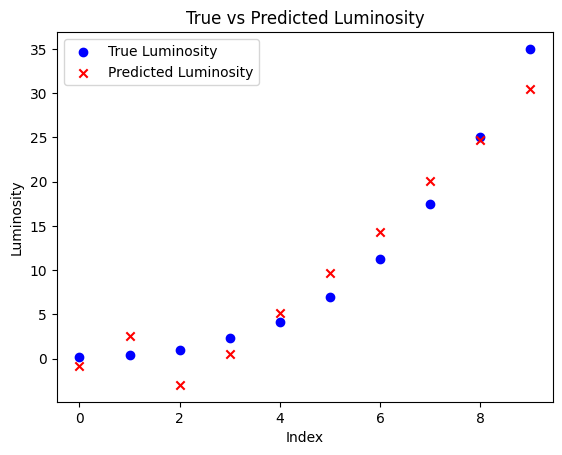

In [52]:
# First case:
alpha = 0.5
num_iterations = 1000
w_init = np.zeros(n)
b_init = 0.0

w_learned, b_learned, it_hist, cost_hist = gradient_descent(X, y, w_init, b_init, alpha, num_iterations)
print("\nLearned parameters:")
print("w =", w_learned)
print("b =", b_learned)


L_pred = predict(X, w_learned, b_learned)
plt.scatter(range(len(y)), y, label="True Luminosity", color="blue")
plt.scatter(range(len(L_pred)), L_pred, label="Predicted Luminosity", color="red", marker='x')
plt.xlabel("Index")
plt.ylabel("Luminosity")
plt.title("True vs Predicted Luminosity")
plt.legend()
plt.show()
    

Iteration    0: cost =   2.8247
Iteration   10: cost =   0.2142
Iteration   20: cost =   0.2141
Iteration   30: cost =   0.2141
Iteration   40: cost =   0.2141
Iteration   50: cost =   0.2141
Iteration   60: cost =   0.2141
Iteration   70: cost =   0.2141
Iteration   80: cost =   0.2141
Iteration   90: cost =   0.2141
Iteration  100: cost =   0.2141
Iteration  110: cost =   0.2141
Iteration  120: cost =   0.2140
Iteration  130: cost =   0.2140
Iteration  140: cost =   0.2140
Iteration  150: cost =   0.2140
Iteration  160: cost =   0.2140
Iteration  170: cost =   0.2140
Iteration  180: cost =   0.2140
Iteration  190: cost =   0.2140
Iteration  200: cost =   0.2140
Iteration  210: cost =   0.2140
Iteration  220: cost =   0.2140
Iteration  230: cost =   0.2140
Iteration  240: cost =   0.2140
Iteration  250: cost =   0.2140
Iteration  260: cost =   0.2140
Iteration  270: cost =   0.2140
Iteration  280: cost =   0.2140
Iteration  290: cost =   0.2140
Iteration  300: cost =   0.2140
Iteratio

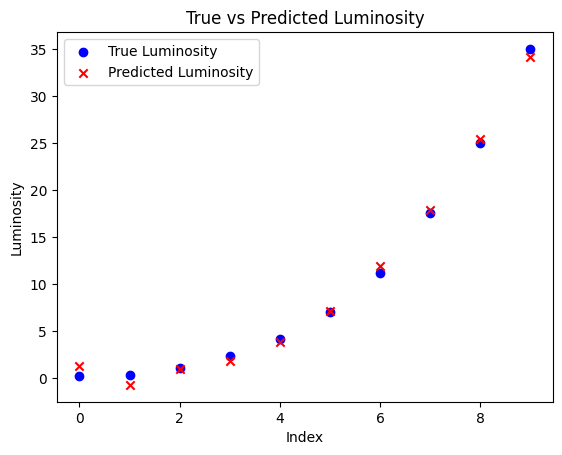

In [53]:
# Second case:
X = np.column_stack([M_norm, T_norm, M_norm**2])
n = X.shape[1]
alpha = 0.5
num_iterations = 1000
w_init = np.zeros(n)
b_init = 0.0

w_learned, b_learned, it_hist, cost_hist = gradient_descent(X, y, w_init, b_init, alpha, num_iterations)
print("\nLearned parameters:")
print("w =", w_learned)
print("b =", b_learned)


L_pred = predict(X, w_learned, b_learned)
plt.scatter(range(len(y)), y, label="True Luminosity", color="blue")
plt.scatter(range(len(L_pred)), L_pred, label="Predicted Luminosity", color="red", marker='x')
plt.xlabel("Index")
plt.ylabel("Luminosity")
plt.title("True vs Predicted Luminosity")
plt.legend()
plt.show()

Iteration    0: cost = 111.1245
Iteration   10: cost =  64.3732
Iteration   20: cost =  39.0827
Iteration   30: cost =  24.6608
Iteration   40: cost =  16.0471
Iteration   50: cost =  10.7071
Iteration   60: cost =   7.3022
Iteration   70: cost =   5.0864
Iteration   80: cost =   3.6232
Iteration   90: cost =   2.6462
Iteration  100: cost =   1.9881
Iteration  110: cost =   1.5412
Iteration  120: cost =   1.2353
Iteration  130: cost =   1.0239
Iteration  140: cost =   0.8761
Iteration  150: cost =   0.7715
Iteration  160: cost =   0.6961
Iteration  170: cost =   0.6407
Iteration  180: cost =   0.5992
Iteration  190: cost =   0.5672
Iteration  200: cost =   0.5419
Iteration  210: cost =   0.5214
Iteration  220: cost =   0.5044
Iteration  230: cost =   0.4900
Iteration  240: cost =   0.4774
Iteration  250: cost =   0.4664
Iteration  260: cost =   0.4566
Iteration  270: cost =   0.4478
Iteration  280: cost =   0.4398
Iteration  290: cost =   0.4325
Iteration  300: cost =   0.4258
Iteratio

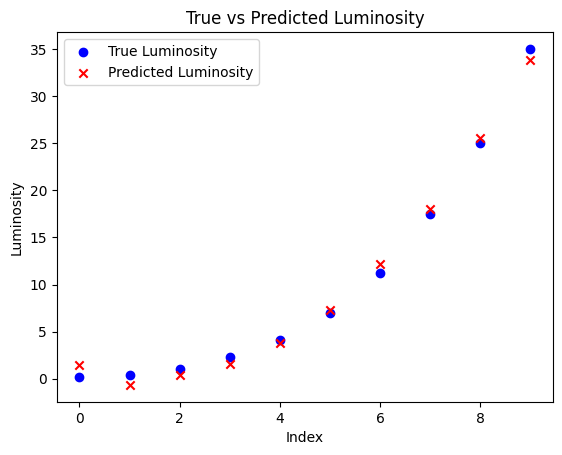

In [54]:
#Third case:
X = np.column_stack([M_norm, T_norm, M_norm**2, M_norm*T_norm])
n = X.shape[1]
alpha = 0.01
num_iterations = 1000
w_init = np.zeros(n)
b_init = 0.0

w_learned, b_learned, it_hist, cost_hist = gradient_descent(X, y, w_init, b_init, alpha, num_iterations)
print("\nLearned parameters:")
print("w =", w_learned)
print("b =", b_learned)


L_pred = predict(X, w_learned, b_learned)
plt.scatter(range(len(y)), y, label="True Luminosity", color="blue")
plt.scatter(range(len(L_pred)), L_pred, label="Predicted Luminosity", color="red", marker='x')
plt.xlabel("Index")
plt.ylabel("Luminosity")
plt.title("True vs Predicted Luminosity")
plt.legend()
plt.show()

In the third case, an extra adjustment was needed in the value of alpha because, on the other hand, the cost value ended up going to infinity.

6. Cost vs interaction (mandatory): for the full model (M3), vary the interaction coefficient w_MT across a reasonable range while keeping the other parameters fixed (e.g., at their trained values). Plot cost vs w_MT and explain what it indicates about interaction importance.

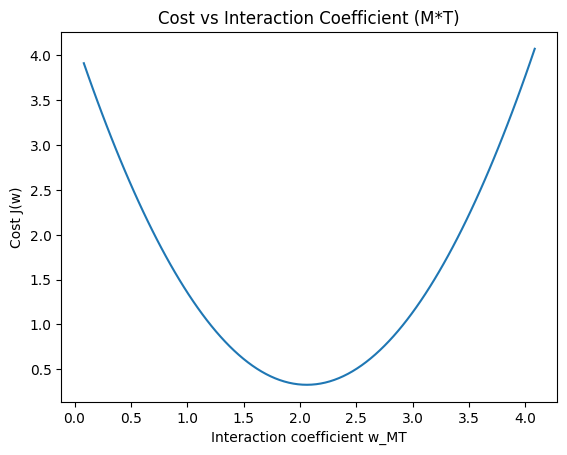

In [55]:
# Define range of interaction coefficient values
w_mt_values = np.linspace(w_learned[3] - 2, w_learned[3] + 2, 100)

cost_values = []

for w_mt in w_mt_values:
    w_temp = w_learned.copy()
    w_temp[3] = w_mt   # modify only interaction coefficient
    
    cost = compute_cost(X, y, w_temp, b_learned)
    cost_values.append(cost)

# Plot cost vs w_MT
plt.plot(w_mt_values, cost_values)
plt.xlabel("Interaction coefficient w_MT")
plt.ylabel("Cost J(w)")
plt.title("Cost vs Interaction Coefficient (M*T)")
plt.show()


- The plot shows a clear minimum of the cost function at a specific value of the interaction coefficient 
𝑤𝑀𝑇.
- This indicates that the interaction term 𝑀⋅𝑇 significantly contributes to reducing the prediction error.
- As 𝑤𝑀𝑇 moves away from this optimal value, the cost increases, showing the model is sensitive to this parameter.
- Therefore, luminosity depends not only on mass and temperature individually, but also on their combined effect.
- This confirms the importance of including interaction features in the regression model.

7. Inference demo (mandatory): predict luminosity for a new star (e.g., M=1.3, T=6600). Comment on reasonableness.
    - In this case, due to the procedure that was followed, it was necessary to first normalize the data. Initially, the model was tested using the raw input values, which produced a prediction that did not make physical sense. After applying normalization, the prediction became much more reasonable and consistent with the original dataset.

In [62]:
M_new = 1.3
T_new = 6600

M_new_norm = (M_new - M.mean()) / M.std()
T_new_norm = (T_new - T.mean()) / T.std()


X_new = np.array([M_new_norm, T_new_norm])
w = np.array([29.4911634, -19.40048469])
b = 10.36000000000001

prediction = X_new @ w + b
print("Predicted luminosity:", prediction)

Predicted luminosity: 3.372109517425855
